In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

# Ignorar warnings para una salida más limpia
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Cargar el dataset
file_path = 'Titanic-Dataset.csv'
df = pd.read_csv(file_path)

In [4]:
# Visualizar las primeras filas del dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

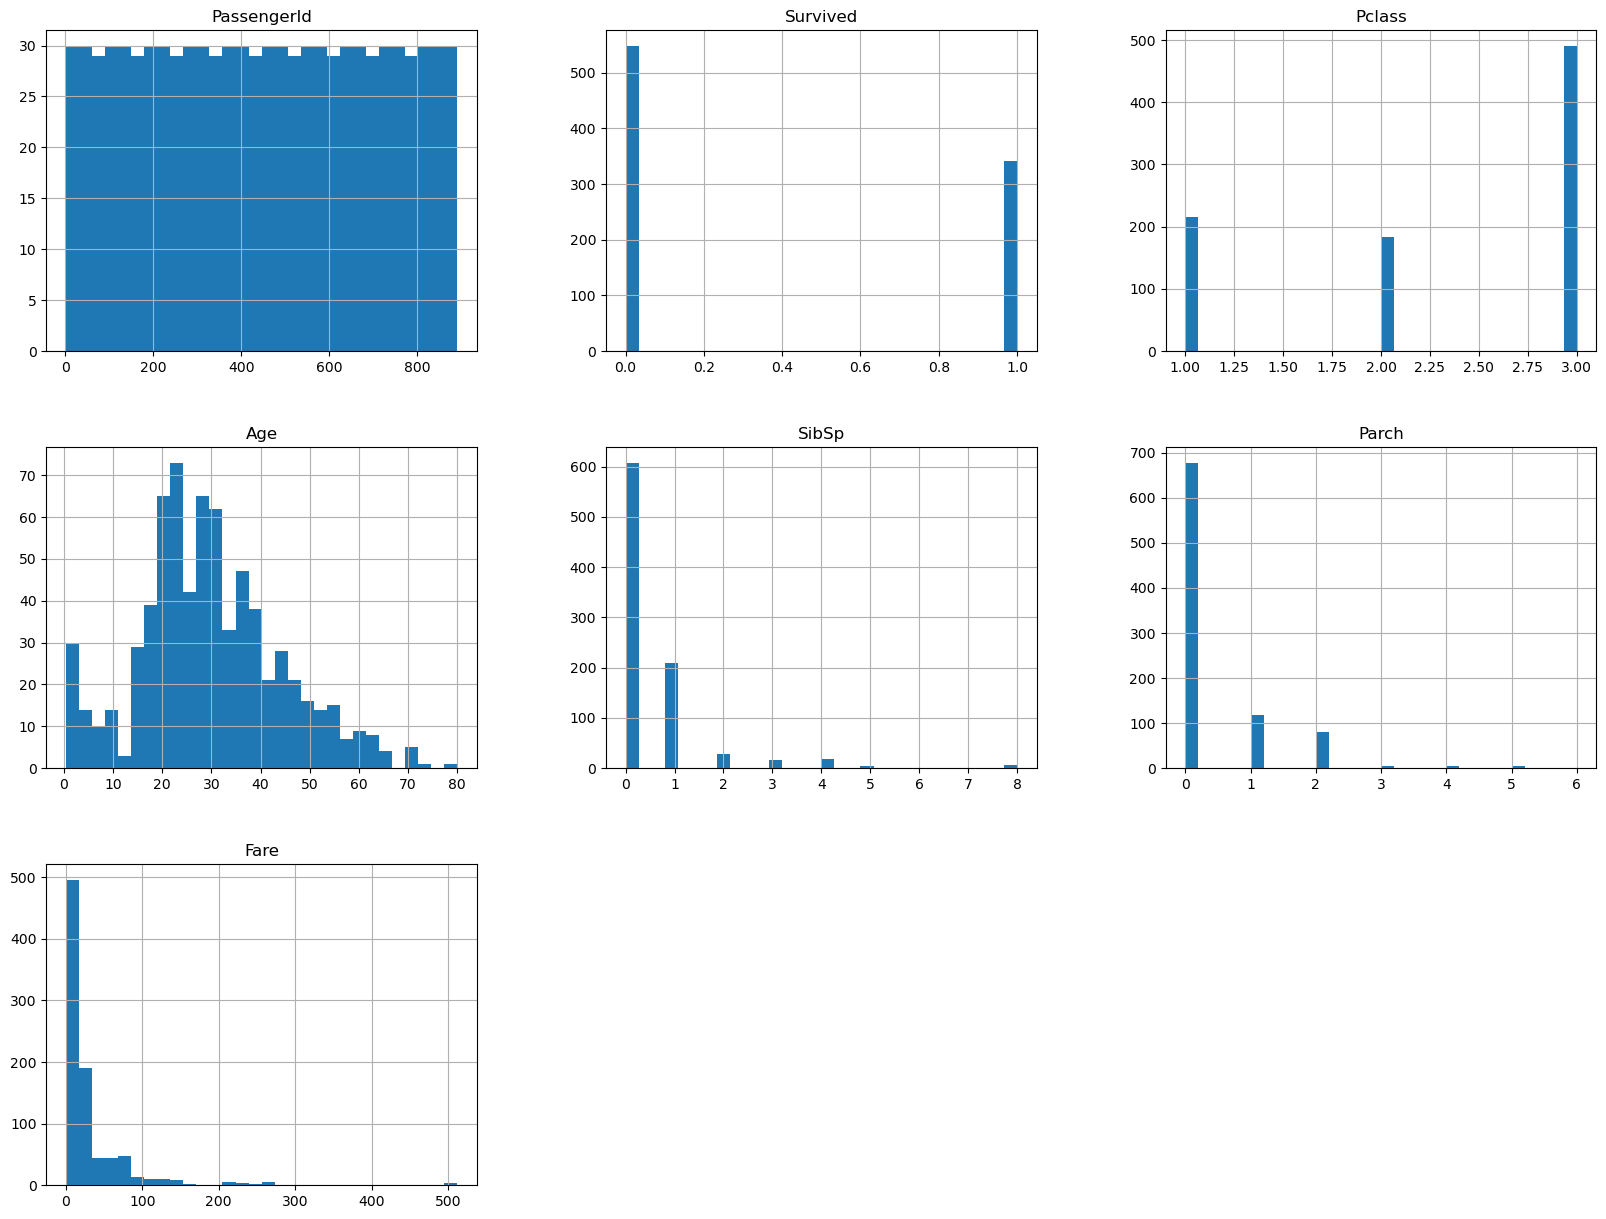

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [5]:
# Paso 1: Análisis Exploratorio de Datos (EDA)
# Estadísticas descriptivas
print(df.describe())

# Verificar tipos de datos y valores faltantes
print(df.info())

# Distribución de variables numéricas
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Correlación entre variables
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [6]:
# Paso 2: Preprocesamiento de Datos
# Verificar valores faltantes
print(df.isnull().sum())

# Podemos rellenar los valores faltantes o eliminar las filas/columnas que los contienen
# Aquí, rellenamos valores faltantes con la mediana o la moda según el tipo de variable

# Rellenar valores numéricos con la mediana
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Rellenar valores categóricos con la moda
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Verificar nuevamente valores faltantes
print(df.isnull().sum())

# Transformar variables categóricas en numéricas (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Verificar la transformación
print(df.head())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1         0       3  22.0      1      0   7.2500   
1            2         1       1  38.0      1      0  71.2833   
2            3         1       3  26.0      0      0   7.9250   
3            4         1       1  35.0      1      0  53.1000   
4            5         0       3  35.0      0      0   8.0500   

   Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                             False                                  Fals

In [7]:
# Paso 4: Dividir el Dataset en Train y Test
X = df.drop('Survived', axis=1)  # Ajusta según la columna objetivo de tu dataset
y = df['Survived']  # Ajusta según la columna objetivo de tu dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 1725) (179, 1725) (712,) (179,)


In [8]:
# Paso 5: Entrenar el Modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Paso 6: Evaluar el Desempeño del Modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.12292049613943613
R^2 Score: 0.4931151072324744


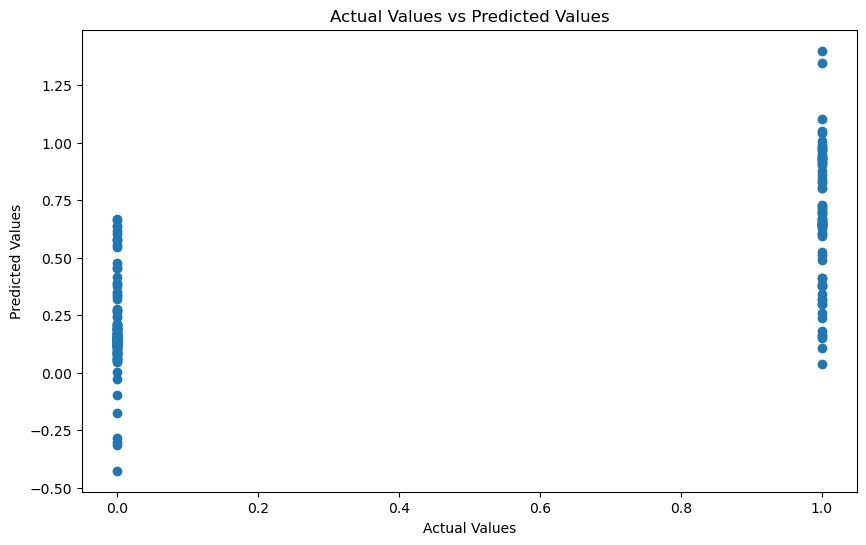

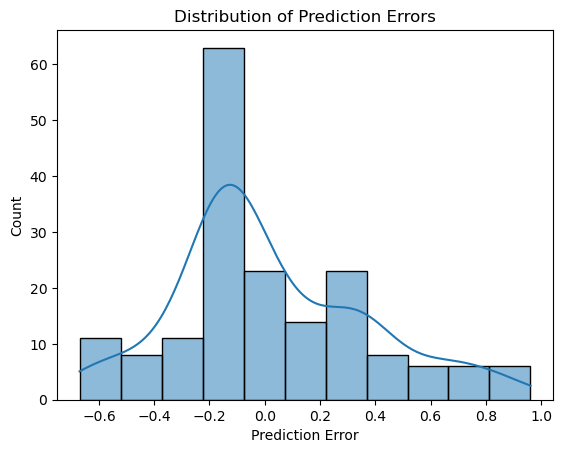

In [10]:
# Paso 7: Visualización de Resultados
# Comparar valores reales vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')
plt.show()

# Distribución de errores
errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.show()


In [11]:
# Paso 8: Interpretación y Documentación
# Coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Conclusión
print("Interpretación de los resultados:")
print("1. El modelo de regresión lineal muestra un MSE de", mse, "y un R^2 Score de", r2)
print("2. La matriz de correlación y los coeficientes del modelo nos dan una idea de cómo cada característica influye en la variable objetivo.")
print("3. La visualización de los valores reales vs. predichos y la distribución de errores nos ayuda a entender la precisión y los errores del modelo.")


             Coefficient
PassengerId     0.000020
Pclass         -0.066494
Age            -0.004604
SibSp          -0.025003
Parch          -0.007316
...                  ...
Cabin_F4        0.131647
Cabin_G6       -0.196232
Cabin_T        -0.112333
Embarked_Q     -0.037510
Embarked_S     -0.066204

[1725 rows x 1 columns]
Interpretación de los resultados:
1. El modelo de regresión lineal muestra un MSE de 0.12292049613943613 y un R^2 Score de 0.4931151072324744
2. La matriz de correlación y los coeficientes del modelo nos dan una idea de cómo cada característica influye en la variable objetivo.
3. La visualización de los valores reales vs. predichos y la distribución de errores nos ayuda a entender la precisión y los errores del modelo.
